In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [43]:
df=pd.read_csv('features.csv')

In [44]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [45]:
df.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [46]:
df.CPI = df.CPI.fillna(df.CPI.median())
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,NaN,False


In [47]:
df.Unemployment = df.Unemployment.fillna(df.Unemployment.median())
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,False


In [48]:
train=pd.read_csv('train.csv')

In [49]:
test=pd.read_csv('test.csv')

In [50]:
df1=pd.concat([train,test],axis=0,sort=False)

In [51]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [52]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
115059,45,98,2013-06-28,NaN,False
115060,45,98,2013-07-05,NaN,False
115061,45,98,2013-07-12,NaN,False
115062,45,98,2013-07-19,NaN,False


In [72]:

store_dummies = pd.get_dummies(df1['Store'])
dept_dummies = pd.get_dummies(df1['Dept'])
holiday_dummies = pd.get_dummies(df1['IsHoliday'])

In [53]:
from sklearn.preprocessing import LabelEncoder
le_IsHoliday = LabelEncoder()

In [54]:
train['IsHoliday_n'] = le_IsHoliday.fit_transform(train['IsHoliday'])

In [55]:
target=train['Weekly_Sales']

In [56]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,IsHoliday_n
0,1,1,2010-02-05,24924.50,False,0
1,1,1,2010-02-12,46039.49,True,1
2,1,1,2010-02-19,41595.55,False,0
3,1,1,2010-02-26,19403.54,False,0
4,1,1,2010-03-05,21827.90,False,0
...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,0
421566,45,98,2012-10-05,628.10,False,0
421567,45,98,2012-10-12,1061.02,False,0
421568,45,98,2012-10-19,760.01,False,0


In [57]:
target

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [58]:
train_n=train.drop(['Weekly_Sales','IsHoliday'],axis='columns')

In [59]:
train_n

,Store,Dept,Date,IsHoliday_n
0,1,1,2010-02-05,0
1,1,1,2010-02-12,1
2,1,1,2010-02-19,0
3,1,1,2010-02-26,0
4,1,1,2010-03-05,0
...,...,...,...,...
421565,45,98,2012-09-28,0
421566,45,98,2012-10-05,0
421567,45,98,2012-10-12,0
421568,45,98,2012-10-19,0


In [60]:
df['IsHoliday_n'] = le_IsHoliday.fit_transform(df['IsHoliday'])

In [61]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,IsHoliday_n
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,False,0
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,False,0
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,False,0
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,False,0


In [62]:
df_n=df.drop('IsHoliday',axis='columns')

In [63]:
df_n

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_n
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,0
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,0
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,0
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,0


In [64]:
duplicate_rows_df = df_n[df_n.duplicated()]

In [65]:
print("number of duplicate rows", duplicate_rows_df.shape)

number of duplicate rows (0, 12)


In [73]:
from datetime import datetime
df_n['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df_n['Date'].astype(str).values.tolist()]
df_n['Month'] = [date.month for date in df_n['DateType']]
df_n['Month'] = 'Month_' + df_n['Month'].map(str)
Month_dummies = pd.get_dummies(df_n['Month'] )

In [74]:
df_n['Black_Friday'] = np.where((df_n['DateType']==datetime(2010, 11, 26).date()) | (df_n['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')
df_n['Pre_christmas'] = np.where((df_n['DateType']==datetime(2010, 12, 23).date()) | (df_n['DateType']==datetime(2010, 12, 24).date()) | (df_n['DateType']==datetime(2011, 12, 23).date()) | (df_n['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')
df_n['Black_Friday'] = 'Black_Friday_' + df_n['Black_Friday'].map(str)
df_n['Pre_christmas'] = 'Pre_christmas_' + df_n['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df_n['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df_n['Pre_christmas'] )

In [75]:
df_n = pd.concat([df_n,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies],axis=1)


ValueError: Shape of passed values is (750382, 22), indices imply (528444, 22)

In [39]:
Month_dummies

,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,0,0,0,0,0,0,0,0,1,0,0,0
8186,0,0,0,0,0,0,0,0,0,1,0,0
8187,0,0,0,0,0,0,0,0,0,1,0,0
8188,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,IsHoliday_n
0,1,1,2010-02-05,24924.50,False,0
1,1,1,2010-02-12,46039.49,True,1
2,1,1,2010-02-19,41595.55,False,0
3,1,1,2010-02-26,19403.54,False,0
4,1,1,2010-03-05,21827.90,False,0
...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,0
421566,45,98,2012-10-05,628.10,False,0
421567,45,98,2012-10-12,1061.02,False,0
421568,45,98,2012-10-19,760.01,False,0


In [28]:
 from datetime import datetime
dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in train.Date]

In [32]:
train['Dates']=dates_list
type(train.Dates)

pandas.core.series.Series

In [33]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,IsHoliday_n,Dates
0,1,1,2010-02-05,24924.50,False,0,2010-02-05
1,1,1,2010-02-12,46039.49,True,1,2010-02-12
2,1,1,2010-02-19,41595.55,False,0,2010-02-19
3,1,1,2010-02-26,19403.54,False,0,2010-02-26
4,1,1,2010-03-05,21827.90,False,0,2010-03-05
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,0,2012-09-28
421566,45,98,2012-10-05,628.10,False,0,2012-10-05
421567,45,98,2012-10-12,1061.02,False,0,2012-10-12
421568,45,98,2012-10-19,760.01,False,0,2012-10-19


In [35]:
train_n

,Store,Dept,Date,IsHoliday_n
0,1,1,2010-02-05,0
1,1,1,2010-02-12,1
2,1,1,2010-02-19,0
3,1,1,2010-02-26,0
4,1,1,2010-03-05,0
...,...,...,...,...
421565,45,98,2012-09-28,0
421566,45,98,2012-10-05,0
421567,45,98,2012-10-12,0
421568,45,98,2012-10-19,0


In [37]:
train_n1=train.drop(['Date'],axis='columns')

In [38]:
train_n1

,Store,Dept,Weekly_Sales,IsHoliday,IsHoliday_n,Dates
0,1,1,24924.50,False,0,2010-02-05
1,1,1,46039.49,True,1,2010-02-12
2,1,1,41595.55,False,0,2010-02-19
3,1,1,19403.54,False,0,2010-02-26
4,1,1,21827.90,False,0,2010-03-05
...,...,...,...,...,...,...
421565,45,98,508.37,False,0,2012-09-28
421566,45,98,628.10,False,0,2012-10-05
421567,45,98,1061.02,False,0,2012-10-12
421568,45,98,760.01,False,0,2012-10-19


In [40]:
test=pd.read_csv('test.csv')

In [41]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [42]:
test['IsHoliday_n'] = le_IsHoliday.fit_transform(test['IsHoliday'])

In [43]:
test

,Store,Dept,Date,IsHoliday,IsHoliday_n
0,1,1,2012-11-02,False,0
1,1,1,2012-11-09,False,0
2,1,1,2012-11-16,False,0
3,1,1,2012-11-23,True,1
4,1,1,2012-11-30,False,0
...,...,...,...,...,...
115059,45,98,2013-06-28,False,0
115060,45,98,2013-07-05,False,0
115061,45,98,2013-07-12,False,0
115062,45,98,2013-07-19,False,0


In [4]:
df2=pd.concat([train,test],axis=0)

NameError: name 'train' is not defined

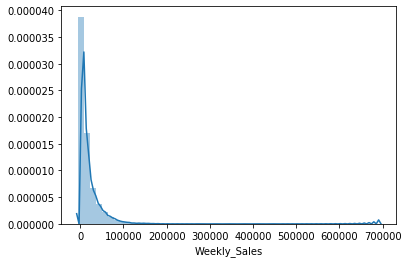

In [45]:
#histogram
sns.distplot(train['Weekly_Sales']);

In [48]:
#skewness and kurtosis
print("Skewness: %f" % train['Weekly_Sales'].skew())
print("Kurtosis: %f" % train['Weekly_Sales'].kurt())

Skewness: 3.262008
Kurtosis: 21.491290


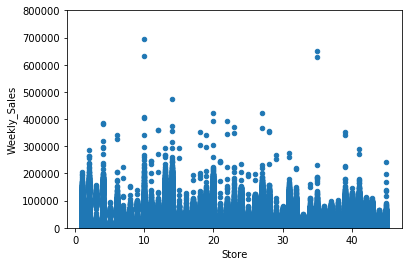

In [49]:
#scatter plot store/Weekly_Sales
var = 'Store'
data = pd.concat([train['Weekly_Sales'], train[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales', ylim=(0,800000));

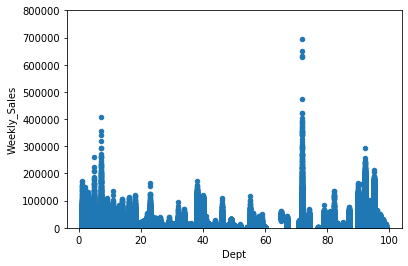

In [50]:
var = 'Dept'
data = pd.concat([train['Weekly_Sales'], train[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales', ylim=(0,800000));

In [3]:
var = 'Date'
data = pd.concat([train['Weekly_Sales'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Weekly_Sales", data=data)
fig.axis(ymin=0, ymax=800000);

NameError: name 'train' is not defined

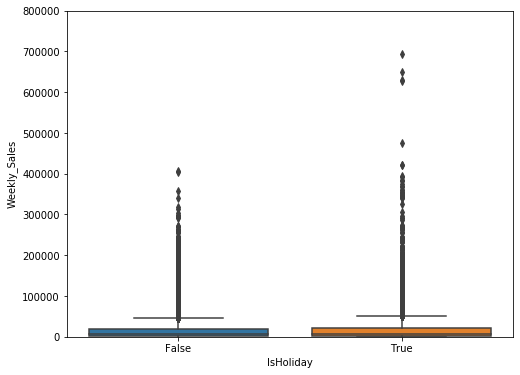

In [52]:
var = 'IsHoliday'
data = pd.concat([train['Weekly_Sales'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Weekly_Sales", data=data)
fig.axis(ymin=0, ymax=800000);

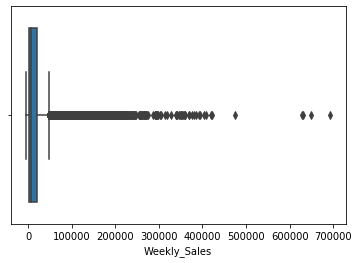

In [53]:
sns.boxplot(x=train['Weekly_Sales'])

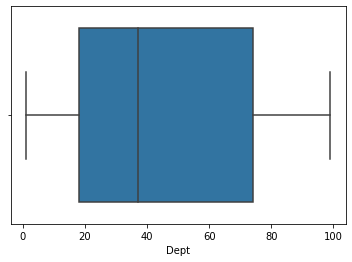

In [54]:
sns.boxplot(x=train['Dept'])

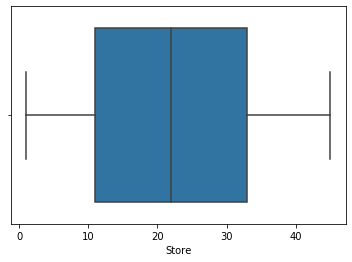

In [55]:
sns.boxplot(x=train['Store'])

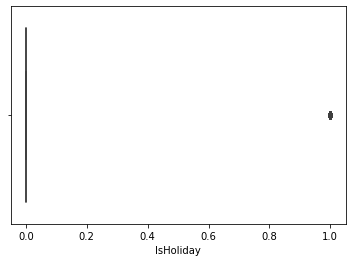

In [56]:
sns.boxplot(x=train['IsHoliday'])

In [57]:
train_n1

,Store,Dept,Weekly_Sales,IsHoliday,IsHoliday_n,Dates
0,1,1,24924.50,False,0,2010-02-05
1,1,1,46039.49,True,1,2010-02-12
2,1,1,41595.55,False,0,2010-02-19
3,1,1,19403.54,False,0,2010-02-26
4,1,1,21827.90,False,0,2010-03-05
...,...,...,...,...,...,...
421565,45,98,508.37,False,0,2012-09-28
421566,45,98,628.10,False,0,2012-10-05
421567,45,98,1061.02,False,0,2012-10-12
421568,45,98,760.01,False,0,2012-10-19


In [59]:

#### train X= Exery thing except Weekly_Sales
train_X=train_n1.drop(['Weekly_Sales','Dates','IsHoliday'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train_n1['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()
train_X.shape, train_y.shape, test_X.shape

((421570, 3), (421570,), (115064, 4))

In [60]:
train_X

,Store,Dept,IsHoliday_n
0,1,1,0
1,1,1,1
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
421565,45,98,0
421566,45,98,0
421567,45,98,0
421568,45,98,0


In [61]:
train_y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [62]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(train_X, train_y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [63]:
clf.score(train_X,train_y)

0.9103645515558839